# Exploring plotting with seaborn

Let's use the [seaborn](https://seaborn.pydata.org/tutorial/introduction.html) plotting library to practice more python principles. Let's first run the introductory scatterplot locally. We'll put this example in a function.

[Functions](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) follow the following format:

```
def function_name(arguments):
    <function body>
```

So, it starts with `def`, followed by the name you want to give it, in this case `function_name`, followed by parentheses, `()`, and finally a colon, `:`. Anything you want to pass into the function will be given a name inside the parentheses: e.g. `arguments`. The `<function body>` contains all the lines of code you want the function to execute

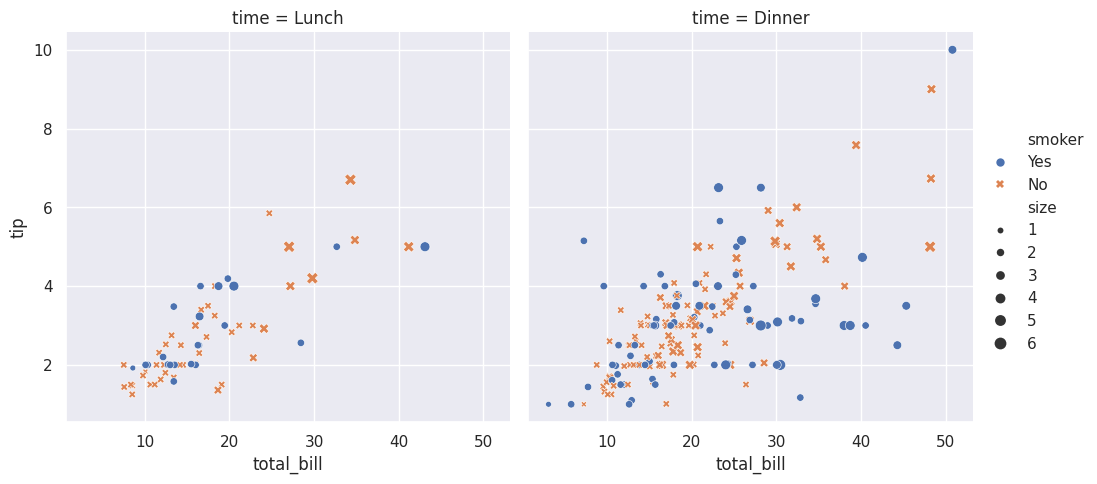

In [2]:
# Copy-paste the introduction scatterplot to this block and run

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an "tips" example dataset
tips = sns.load_dataset("tips")

# paste the relplot calls into the function body
def plot_sns_tips_example():
    # Create a visualization
    sns.relplot(
        data=tips,
        x="total_bill", y="tip", col="time",
        hue="smoker", style="smoker", size="size",
    )

# call our function below
plot_sns_tips_example()

We've generated a plot with a few commands, but let's learn what each command means.

We'll explore `set_theme()` below and customize it. That made the graph itself look pretty. Try clearing the outputs of this jupyter notebook and commenting out the `set_theme()` line and see the difference.

Using either `python` console's `help()` function, `pydoc3` or your IDE, look at the help messaging for `load_dataset()`. Do you see a way to print the names? Do you see a link explaining a dataset? What type did this return to us?

In [3]:
# print type of tips
print(type(tips))

# print all datasets you have available to you
print(sns.get_dataset_names())

<class 'pandas.core.frame.DataFrame'>
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Inside the `relplot` call above, we used many strings associated with the data set (e.g. `total_bill` and `smoker`). These are the column names found in the data frame.

In [4]:
# print the columns
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

As far as I can tell, seaborn doesn't offer inline metadata describing the columns, but it does provide a link to the data sets in its `load_datasets` documentation. Navigate through here and describe each column used name below:
* `total_bill` : total bill, in dollars
* `tip` : tip amount, in dollars
* `time` : time of day, categorical
* `smoker` : whether a smoker was present in party, categorical
* `size` : number of members of the party

## Themes

We'll explore in more detail how to set the theme for your plot. To see more of what seaborn has to offer, look at their [aesthetics tutorial](https://seaborn.pydata.org/tutorial/aesthetics.html).

### Palettes

Let's customize our plot by selecting a color palette to our liking. You can find an intro on [their webpage](https://seaborn.pydata.org/tutorial/color_palettes.html). We'll use the `sns.color_palette()` function to sample various colors.

Seaborn interacts with jupyter notebooks nicely in that it will print the sample colors if you run the `sns.color_palette()` on the last line.

In [5]:
# put a string of your favorite color_palette from the seaborn example page into the color_palette
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Alternatively, we can view a `color_palette` with Seaborn's built-in function call `palplot()` and `matplotlib.pyplot.show()`

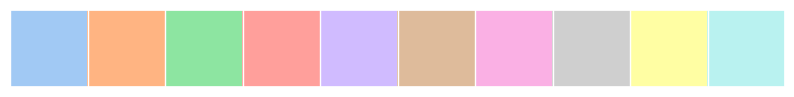

In [6]:
import matplotlib.pyplot as plt

sns.palplot(sns.color_palette('pastel')) # display another unique palette 
plt.show() # call matplotib's show function

Let's create another function that passes in a list of palette names and then plots each one

In [7]:
# Create a function that takes in a list of names, loops through and plots each color palette
def plot_many_palettes(names):
    for name in names:
        print(f"Plotting color palette {name}:")
        sns.palplot(sns.color_palette(name))
        plt.show()

Let's call this function and plot three more unique color palettes.

Plotting color palette flare:


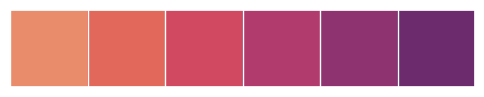

Plotting color palette husl:


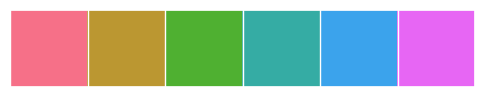

Plotting color palette Spectral:


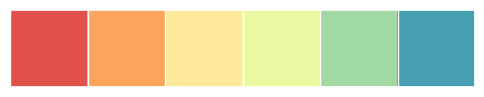

In [9]:
# call the plot_many_palettes and pass in a list of strings
plot_many_palettes(['flare', 'husl', 'Spectral'])

### Editing a font

Seaborn allows us to set the font style and size with `set_theme`. The size of the font is scaled with the `font_scale` parameter, while the font style is set with the `font` parameter.


Seaborn documentation tells us to consult [matplotlib documentation](https://matplotlib.org/stable/users/explain/text/fonts.html) for font information. We can use the `matplotlib.font_manager.get_font_names` to print all fonts available to us on our machine. These fonts should match the ones you find in Microsoft Word.

In [10]:
# import font_manager directly from matplotlib library
from matplotlib import font_manager

# call font_manager's get_font_names function
font_manager.get_font_names()

['Noto Sans Inscriptional Pahlavi',
 'Noto Serif CJK JP',
 'Noto Sans Rejang',
 'Noto Sans Symbols2',
 'GLYPHICONS Halflings',
 'Noto Sans Symbols',
 'Noto Sans Sinhala',
 'Noto Sans Brahmi',
 'Noto Kufi Arabic',
 'cmtt10',
 'Noto Sans Deseret',
 'Pagul',
 'Noto Sans Ogham',
 'Noto Sans Multani',
 'cmsy10',
 'Noto Sans Modi',
 'stmary10',
 'Noto Sans Math',
 'Noto Sans Saurashtra',
 'Noto Serif Myanmar',
 'Chilanka',
 'Noto Sans',
 'Samyak Gujarati',
 'STIXSizeTwoSym',
 'Noto Serif Georgian',
 'Chandas',
 'Henny Penny',
 'Noto Serif Dogra',
 'Noto Serif Armenian',
 'MathJax_Size3',
 'Noto Sans Kannada',
 'Montserrat Light',
 'cmmi10',
 'Noto Serif Ahom',
 'Ramaraja',
 'MathJax_Typewriter',
 'Noto Serif Yezidi',
 'Noto Sans Batak',
 'URW Bookman',
 'KacstScreen',
 'msam10',
 'Mandali',
 'Mukti',
 'Noto Mono',
 'Baloo 2',
 'Noto Sans Meroitic',
 'KacstPen',
 'Nimbus Roman',
 'KacstTitleL',
 'Vemana2000',
 'Kalimati',
 'Noto Sans Sora Sompeng',
 'Noto Sans NKo',
 'Noto Sans Mahajani',
 'N

Pick a font name (the name before the `.ttf` extension). This is what seaborn will recognize. We can confirm that `matplotlib` will recognize the font with the `findfont()` function

In [11]:
# confirm The font exists with findfont inside font_manager
font_manager.findfont("DejaVu Sans")

'/home/clintc/projects/lab-lessons/python/lessons/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

### Theme Style

We can set the overall style using the `set_style` function or by altering the `style` parameter in `set_theme`. Let's set

### Setting the theme

Now that we've sampled a few palettes and fonts, let's customize the original plot.

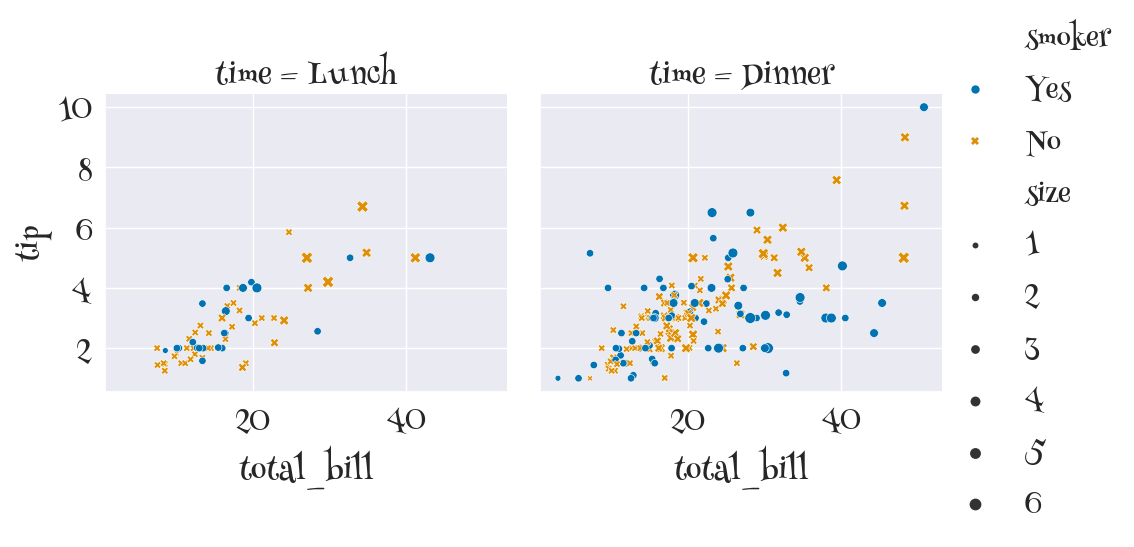

In [12]:
# use set_theme to set the colors, font, and font scale
sns.set_theme(palette=sns.color_palette('colorblind'), font='Henny Penny', font_scale=1.8)
plot_sns_tips_example()

# Creating and Manipulating Pandas Data Frames

Let's practice making a pandas data frame from scratch. Pandas offers many different ways to achieve this (see [DataFrame documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame)). We'll create some random values and generate our first `DataFrame` object.

## Aside, random number generation

We will use this time to introduce random number generation. The `numpy` library can generate numbers of many distribution types. Let's explore a few.

In [ ]:
import numpy as np

rng = np.random.default_rng(seed=12323)

n_row = 100

# Create 2 independent arrays of different random distributions 
x = rng.normal(size=n_row)
y = rng.uniform(size=n_row)

# Create a dependent variable array combining the other two with some variation
dep = (2 * x + 10 * y) * rng.normal(loc=1, scale=0.01, size=n_row)

Now, to convert these arrays into a data frame, we can use a dictionary. Using a column name as the key and the arrays as the values, we can simulate a table. We'll then pass that dictionary into a `pandas.DataFrame`.

## Creating a DataFrame from a dictionary

In [ ]:
import pandas as pd

# Create a dictionary, where the keys are the column names, and the values are the arrays we created above
rand_dict = {'idx':range(n_row), 'x':x, 'y':y, 'dep':dep}

# create a pandas DataFrame from the above dictionary
rand_df = pd.DataFrame(rand_dict)
rand_df

,idx,x,y,dep
0,0,1.161189,0.807422,10.361539
1,1,-1.669703,0.696968,3.654668
2,2,0.577530,0.882061,9.928062
3,3,-0.628163,0.597901,4.664059
4,4,1.570642,0.048966,3.643512
...,...,...,...,...
95,95,0.933047,0.225033,4.147199
96,96,2.202770,0.993512,14.259365
97,97,-0.246039,0.506265,4.559993
98,98,-0.675813,0.324298,1.862368


Let's load a `DataFrame` from a spreadsheet. From the `example-data` directory from the same repo that this notebook came from, we can find an excel spreadsheet labeled `multiple_variables_example.xlsx`. Let's load that using `pandas.read_excel`.

**Note:** This may require an additional package install. Remember, use `pip install <package_name>` if a package is required.

In [ ]:
from pathlib import Path

# use read_excel to save the spreadsheet as a dataframe
df = pd.read_excel(Path('/home/clintc/projects/lab-lessons/example-data/multiple_variables_example.xlsx'))

It is common to have to doctor data as it comes into another language. For example, this data uses a dot (`.`) to separate words. For example, this data set has `height.cm`. A name like this can confuse python code. In python, the dot is reserved to separate [object](https://docs.python.org/3/tutorial/classes.html) members. Instead we should separate words with underscores (`_`). Dataframes allow for easy renaming of columns. Again, we use a dictionary to do this.

The `rename()` function built into a `DataFrame` object expects a dictionary, where the key is the old name and the value is the new name.

In [ ]:
# rename columns 'age.yr' -> 'age_yr' and 'height.cm' -> 'height_cm'
df = df.rename(columns={'age.yr':'age_yr','height.cm':'height_cm'}) # R naming conventions can cause problems in python

We can also drop columns we are not interested in, We can do this from the `read_excel()` function used above, or later, with the `DataFrame` function `drop()`. We will pass into its `columns` parameter the `obs` column to drop. 

In [ ]:
# drop the 'obs' column from the data frame
df = df.drop(columns=['obs']) # We're not interested in observation number